<a href="https://colab.research.google.com/github/Harshini-BS/colab/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5018 - loss: 0.8027 - val_accuracy: 0.5926 - val_loss: 0.6777
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6819 - loss: 0.5980 - val_accuracy: 0.6481 - val_loss: 0.6520
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7304 - loss: 0.5280 - val_accuracy: 0.6481 - val_loss: 0.6324
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7594 - loss: 0.4862 - val_accuracy: 0.6944 - val_loss: 0.6195
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7961 - loss: 0.4389 - val_accuracy: 0.6944 - val_loss: 0.6144
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8602 - loss: 0.3830 - val_accuracy: 0.7130 - val_loss: 0.6155
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8625 - loss: 0.3646 - val_accuracy: 0.7037 - val_loss: 0.6175
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8913 - loss: 0.3238 - val_accuracy: 0.7130 - val_loss: 0.6277
E

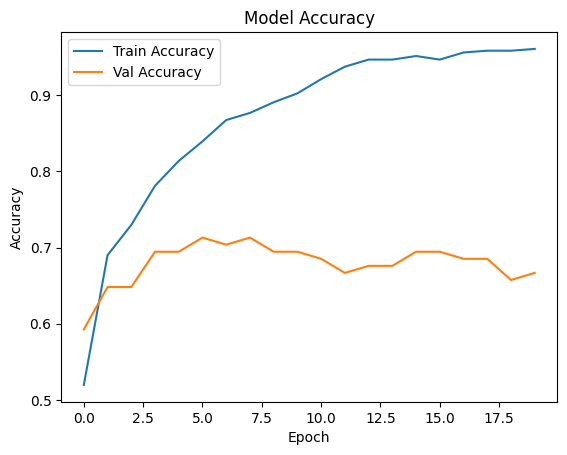

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6375 - loss: 1.0314 

Test Accuracy: 66.67%


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset (after downloading it manually or using Kaggle API)
df = pd.read_csv('super_hero_powers.csv')  # Dataset from Kaggle

# Merge with publisher info from characters.csv if needed
characters = pd.read_csv('heroes_information.csv')

# Drop rows with missing publisher
characters = characters.dropna(subset=['Publisher'])

# Select only Marvel and DC characters
characters = characters[characters['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

# Merge powers with character info using 'name'
df = pd.merge(df, characters[['name', 'Publisher']], left_on='hero_names', right_on='name', how='inner')

# Drop name column
df = df.drop('hero_names', axis=1)
df = df.drop('name', axis=1)

# Encode Publisher
df['Publisher'] = df['Publisher'].map({'Marvel Comics': 1, 'DC Comics': 0})

# Separate features and label
X = df.drop('Publisher', axis=1)
y = df['Publisher']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

**To fix this error:**

1.  **Download the dataset:** This dataset is from Kaggle. You can download it manually from the Kaggle website or use the Kaggle API to download it programmatically.
2.  **Upload to Colab:** Once downloaded, upload the `super_hero_powers.csv` and `heroes_information.csv` files to your Google Colab environment. You can do this by clicking the folder icon on the left sidebar, then the upload icon.
3.  **Verify the file path:** Ensure the files are in the current directory or provide the correct path in the `pd.read_csv()` calls.